<a href="https://colab.research.google.com/github/Tsukada073/othello2024/blob/main/2024%E3%82%AA%E3%82%BB%E3%83%AD_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# オセロ：発展プログラミング

予定
- __12/2__ キックオフ＆コードリーディング
- __12/9__ 自作AI（EagarAIとの対戦）& 強いAIを作るには？
- __12/16__ コード共有(Githubの使い方）
- __12/23__ 団体戦
- __1/20__ 最終回（個人戦？）




## データ構造

In [ ]:
BLACK=1
WHITE=2

board = [
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,1,2,0,0],
        [0,0,2,1,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
]


## AI

- face()メソッド
- place(board, stone) ボードと色を与えられたら置く場所を返す

In [ ]:
class AI(object):

    def face(self):
        return "🐼"

    def place(self, board, stone):
        return x, y


# 例: PandaAI

In [ ]:
import math
import random

BLACK=1
WHITE=2

board = [
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,1,2,0,0],
        [0,0,2,1,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
]

def can_place_x_y(board, stone, x, y):
    """
    石を置けるかどうかを調べる関数。
    board: 2次元配列のオセロボード
    x, y: 石を置きたい座標 (0-indexed)
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    return: 置けるなら True, 置けないなら False
    """
    if board[y][x] != 0:
        return False  # 既に石がある場合は置けない

    opponent = 3 - stone  # 相手の石 (1なら2、2なら1)
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        found_opponent = False

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            nx += dx
            ny += dy
            found_opponent = True

        if found_opponent and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            return True  # 石を置ける条件を満たす

    return False

def can_place(board, stone):
    """
    石を置ける場所を調べる関数。
    board: 2次元配列のオセロボード
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    """
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                return True
    return False

def random_place(board, stone):
    """
    石をランダムに置く関数。
    board: 2次元配列のオセロボード
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    """
    while True:
        x = random.randint(0, len(board[0]) - 1)
        y = random.randint(0, len(board) - 1)
        if can_place_x_y(board, stone, x, y):
            return x, y

'''
class EagarAI(object):

    def face(self):
        return "🐈"

    def flip_count(self, board, stone, x, y):
        """
        指定の座標に石を置いた場合にひっくり返せる石の数を計算する。
        """
        opponent = 3 - stone
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        total_flips = 0

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            flips = 0

            while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
                nx += dx
                ny += dy
                flips += 1

            if flips > 0 and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
                total_flips += flips

        return total_flips

    def get_valid_moves(self, board, stone):
        """
        置けるすべての有効な座標をリストとして返す。
        """
        valid_moves = []
        for y in range(len(board)):
            for x in range(len(board[0])):
                if can_place_x_y(board, stone, x, y):
                    valid_moves.append((x, y))
        return valid_moves

    def prioritize_moves(self, moves, board):
        """
        コーナーとエッジを優先するため、スコアを付けて評価する。
        """
        score_map = {}
        width, height = len(board[0]), len(board)

        for x, y in moves:
            # 初期スコア（通常のマス）
            score = 1

            # コーナー
            if (x, y) in [(0, 0), (0, height - 1), (width - 1, 0), (width - 1, height - 1)]:
                score += 100

            # エッジ
            elif x == 0 or x == width - 1 or y == 0 or y == height - 1:
                score += 10

            score_map[(x, y)] = score

        # スコアで降順ソートしてリストを返す
        return sorted(score_map.items(), key=lambda item: item[1], reverse=True)

    def place(self, board, stone):
        valid_moves = self.get_valid_moves(board, stone)

        if not valid_moves:
            return None  # 有効な手がない場合

        # 各手のひっくり返せる数を計算
        move_scores = [(x, y, self.flip_count(board, stone, x, y)) for x, y in valid_moves]

        # 最多ひっくり返せる手を抽出
        max_flips = max(move_scores, key=lambda m: m[2])[2]
        best_moves = [(x, y) for x, y, flips in move_scores if flips == max_flips]

        # 最多の手の中からコーナーやエッジを優先
        prioritized_moves = self.prioritize_moves(best_moves, board)

        # 最も優先度の高い手を選択
        best_move = prioritized_moves[0][0]  # 優先度の高い手の座標を取得
        return best_move
'''
class PandaAI(object):

    def face(self):
        return "🐼"

    def place(self, board, stone):
        x, y = random_place(board, stone)
        return x, y


## コードリーディング

- PandaAIを読んで内容の把握
- PandaAIを直して、一番多く取れるところに置くEagarAIを作成

In [ ]:
class EagarAI(object):

    def face(self):
        return "🐈"

    def flip_count(self, board, stone, x, y):
        """
        指定の座標に石を置いた場合にひっくり返せる石の数を計算する。
        """
        opponent = 3 - stone
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        total_flips = 0

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            flips = 0

            while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
                nx += dx
                ny += dy
                flips += 1

            if flips > 0 and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
                total_flips += flips

        return total_flips

    def get_valid_moves(self, board, stone):
        """
        置けるすべての有効な座標をリストとして返す。
        """
        valid_moves = []
        for y in range(len(board)):
            for x in range(len(board[0])):
                if can_place_x_y(board, stone, x, y):
                    valid_moves.append((x, y))
        return valid_moves

    def prioritize_moves(self, moves, board):
        """
        コーナーとエッジを優先するため、スコアを付けて評価する。
        """
        score_map = {}
        width, height = len(board[0]), len(board)

        for x, y in moves:
            # 初期スコア（通常のマス）
            score = 1

            # コーナー
            if (x, y) in [(0, 0), (0, height - 1), (width - 1, 0), (width - 1, height - 1)]:
                score += 100

            # エッジ
            elif x == 0 or x == width - 1 or y == 0 or y == height - 1:
                score += 10

            score_map[(x, y)] = score

        # スコアで降順ソートしてリストを返す
        return sorted(score_map.items(), key=lambda item: item[1], reverse=True)

    def place(self, board, stone):
        valid_moves = self.get_valid_moves(board, stone)

        if not valid_moves:
            return None  # 有効な手がない場合

        # 各手のひっくり返せる数を計算
        move_scores = [(x, y, self.flip_count(board, stone, x, y)) for x, y in valid_moves]

        # 最多ひっくり返せる手を抽出
        max_flips = max(move_scores, key=lambda m: m[2])[2]
        best_moves = [(x, y) for x, y, flips in move_scores if flips == max_flips]

        # 最多の手の中からコーナーやエッジを優先
        prioritized_moves = self.prioritize_moves(best_moves, board)

        # 最も優先度の高い手を選択
        best_move = prioritized_moves[0][0]  # 優先度の高い手の座標を取得
        return best_move



🐼は(3, 1)におきました。黒: 4, 白: 1

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-15-267294e875ea> in <cell line: 2>()
      1 from weareteamphys.CatAI import EagarAI  # 自分のAIをインポートする
----> 2 run_othello(PandaAI(), EagarAI()) # 黒, 白
      3 run_othello(EagarAI(), PandaAI()) # 白, 黒



2 frames
/content/weareteamphys/CatAI.py in get_valid_moves(self, board, stone)

# 対戦

In [ ]:
!pip install -U kogi-canvas

#

In [ ]:
from kogi_canvas import play_othello, PandaAI

BLACK=1
WHITE=2

board = [
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,1,2,0,0],
        [0,0,2,1,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
]

play_othello(EagarAI()) # ここを自分の作ったAIに変える

🐈は (1, 2) におきました。
🐈は (2, 5) におきました。
🐈は (0, 1) におきました。
🐈は (4, 2) におきました。
🐈は (0, 3) におきました。
🐈は (3, 0) におきました。
そこに置けません (4, 3)
🐈は (2, 1) におきました。
そこに置けません (1, 1)
そこに置けません (4, 3)
🐈は (1, 5) におきました。
🐈は (3, 5) におきました。
🐈は (0, 5) におきました。
🐈は (1, 0) におきました。
🐈は (4, 0) におきました。
🐈は (5, 3) におきました。
🐈は (4, 5) におきました。
🐈は (5, 1) におきました。
🐈は (5, 4) におきました。
黒: 23, 白: 13 黒の勝ち


In [ ]:
from kogi_canvas import Canvas
import math
import random

BLACK=1
WHITE=2

board = [
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,1,2,0,0],
        [0,0,2,1,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
]

def can_place_x_y(board, stone, x, y):
    """
    石を置けるかどうかを調べる関数。
    board: 2次元配列のオセロボード
    x, y: 石を置きたい座標 (0-indexed)
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    return: 置けるなら True, 置けないなら False
    """
    if board[y][x] != 0:
        return False  # 既に石がある場合は置けない

    opponent = 3 - stone  # 相手の石 (1なら2、2なら1)
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        found_opponent = False

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            nx += dx
            ny += dy
            found_opponent = True

        if found_opponent and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            return True  # 石を置ける条件を満たす

    return False

def can_place(board, stone):
    """
    石を置ける場所を調べる関数。
    board: 2次元配列のオセロボード
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    """
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                return True
    return False

def random_place(board, stone):
    """
    石をランダムに置く関数。
    board: 2次元配列のオセロボード
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    """
    while True:
        x = random.randint(0, len(board[0]) - 1)
        y = random.randint(0, len(board) - 1)
        if can_place_x_y(board, stone, x, y):
            return x, y

class PandaAI(object):

    def face(self):
        return "🐼"

    def place(self, board, stone):
        x, y = random_place(board, stone)
        return x, y

play_othello(PandaAI())


🐼は (4, 3) におきました。
🐼は (1, 1) におきました。
🐼は (4, 4) におきました。
🐼は (0, 4) におきました。
🐼は (4, 2) におきました。
🐼は (5, 2) におきました。
🐼は (4, 0) におきました。
🐼は (4, 5) におきました。
🐼は (1, 2) におきました。
🐼は (2, 0) におきました。
🐼は (5, 0) におきました。
🐼は (0, 1) におきました。
そこに置けません (5, 5)
そこに置けません (0, 5)
そこに置けません (0, 5)
🐼は (2, 5) におきました。
🐼は (1, 5) におきました。
🐼はどこにも置けないのでスキップします
🐼はどこにも置けないのでスキップします
🐼は (1, 0) におきました。
黒: 24, 白: 12 黒の勝ち


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from collections import deque

# 迷路の設定（0は道、1は壁）
maze = np.array([
    [0, 1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0]
])

# 開始と終了地点
start = (0, 0)
goal = (4, 5)

# 色付け用
colors = {
    'wall': (0, 0, 0),          # 壁: 黒
    'path': (1, 1, 1),          # 道: 白
    'visited': (0.5, 0.5, 1),   # 探索済み: 青
    'current': (0.5, 0.5, 1),   # 現在探索中: 赤
    'goal': (0.5, 1, 0.5)       # ゴール: 緑
}

def visualize_maze(maze, path, title=""):
    fig, ax = plt.subplots(figsize=(5, 5))
    ims = []

    # 初期状態
    img = np.zeros((*maze.shape, 3))
    for r in range(maze.shape[0]):
        for c in range(maze.shape[1]):
            img[r, c] = colors['wall'] if maze[r, c] == 1 else colors['path']

    # アニメーション用フレーム生成
    for step in path:
        frame = img.copy()
        for r, c in step.get('visited', []):
            frame[r, c] = colors['visited']
        if 'current' in step:
            r, c = step['current']
            frame[r, c] = colors['current']
        frame[goal[0], goal[1]] = colors['goal']
        im = ax.imshow(frame, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True)
    ax.set_title(title)
    plt.close()
    return ani

# 深さ優先探索（DFS）
def dfs(maze, start, goal):
    stack = [start]
    visited = set()
    path = []

    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.add(current)

        # アニメーション用データ記録
        path.append({'visited': list(visited), 'current': current})

        if current == goal:
            return path

        r, c = current
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < maze.shape[0] and 0 <= nc < maze.shape[1]:
                if maze[nr, nc] == 0 and (nr, nc) not in visited:
                    stack.append((nr, nc))
    return path

# 幅優先探索（BFS）
def bfs(maze, start, goal):
    queue = deque([start])
    visited = set()
    path = []

    while queue:
        current = queue.popleft()
        if current in visited:
            continue
        visited.add(current)

        # アニメーション用データ記録
        path.append({'visited': list(visited), 'current': current})

        if current == goal:
            return path

        r, c = current
        for dr, dc in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < maze.shape[0] and 0 <= nc < maze.shape[1]:
                if maze[nr, nc] == 0 and (nr, nc) not in visited:
                    queue.append((nr, nc))
    return path

# アニメーション表示
dfs_path = dfs(maze, start, goal)
bfs_path = bfs(maze, start, goal)

dfs_animation = visualize_maze(maze, dfs_path, title="DFS Visualization")
bfs_animation = visualize_maze(maze, bfs_path, title="BFS Visualization")

from IPython.display import HTML
HTML(dfs_animation.to_html5_video())
#BFSも表示したい場合は以下を実行
#HTML(bfs_animation.to_html5_video())


In [ ]:
!git clone https://github.com/kkuramitsu/othello2024.git

Cloning into 'othello2024'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 159 (delta 63), reused 58 (delta 16), pack-reused 48 (from 1)
Receiving objects: 100% (159/159), 83.52 KiB | 652.00 KiB/s, done.
Resolving deltas: 100% (74/74), done.


In [ ]:
!pip install -U kogi-canvas
import math
import random
from kogi_canvas import play_othello

BLACK = 1
WHITE = 2

# 8x8のオセロボード（標準的な初期配置）
board = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 2, 0, 0, 0],
    [0, 0, 0, 2, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
]

def can_place_x_y(board, stone, x, y):
    if board[y][x] != 0:
        return False

    opponent = 3 - stone
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        found_opponent = False

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            nx += dx
            ny += dy
            found_opponent = True

        if found_opponent and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            return True

    return False

def can_place(board, stone):
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                return True
    return False

def get_valid_moves(board, stone):
    moves = []
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                moves.append((x, y))
    return moves

def apply_move(board, stone, x, y):
    opponent = 3 - stone
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    board[y][x] = stone

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        tiles_to_flip = []

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            tiles_to_flip.append((nx, ny))
            nx += dx
            ny += dy

        if 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            for flip_x, flip_y in tiles_to_flip:
                board[flip_y][flip_x] = stone

class MinimaxAI(object):

    def face(self):
        return "🤖"  # 顔を「🤖」に変更

    def evaluate_board(self, board):
        """
        現在のボード状態を評価する。
        """
        evaluation_table = [
            [100, -20, 10,  5,  5, 10, -20, 100],
            [-20, -50, -2, -2, -2, -2, -50, -20],
            [ 10,  -2,  1,  1,  1,  1,  -2,  10],
            [  5,  -2,  1,  0,  0,  1,  -2,   5],
            [  5,  -2,  1,  0,  0,  1,  -2,   5],
            [ 10,  -2,  1,  1,  1,  1,  -2,  10],
            [-20, -50, -2, -2, -2, -2, -50, -20],
            [100, -20, 10,  5,  5, 10, -20, 100],
        ]
        score = 0
        for y in range(len(board)):
            for x in range(len(board[0])):
                if board[y][x] == BLACK:
                    score += evaluation_table[y][x]
                elif board[y][x] == WHITE:
                    score -= evaluation_table[y][x]
        return score

    def minimax(self, board, depth, stone, maximizing_player):
        if depth == 0 or not can_place(board, stone):
            return self.evaluate_board(board), None, None

        valid_moves = get_valid_moves(board, stone)
        best_move = None

        if maximizing_player:
            max_eval = float('-inf')
            for x, y in valid_moves:
                temp_board = [row[:] for row in board]
                apply_move(temp_board, stone, x, y)
                eval, _, _ = self.minimax(temp_board, depth - 1, 3 - stone, False)
                if eval > max_eval:
                    max_eval = eval
                    best_move = (x, y)
            return max_eval, best_move[0], best_move[1]
        else:
            min_eval = float('inf')
            for x, y in valid_moves:
                temp_board = [row[:] for row in board]
                apply_move(temp_board, stone, x, y)
                eval, _, _ = self.minimax(temp_board, depth - 1, 3 - stone, True)
                if eval < min_eval:
                    min_eval = eval
                    best_move = (x, y)
            return min_eval, best_move[0], best_move[1]

    def place(self, board, stone):
        _, x, y = self.minimax(board, 3, stone, True)
        return x, y

# MinimaxAI を kogi-canvas の play_othello に適用
play_othello(MinimaxAI())


In [ ]:
!pip install -U kogi-canvas
import math
import random

BLACK = 1
WHITE = 2

# 8×8のオセロボード（標準的な初期配置）
board = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 2, 0, 0, 0],
    [0, 0, 0, 2, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
]

def can_place_x_y(board, stone, x, y):
    """
    石を置けるかどうかを調べる関数。
    board: 2次元配列のオセロボード
    x, y: 石を置きたい座標 (0-indexed)
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    return: 置けるなら True, 置けないなら False
    """
    if board[y][x] != 0:
        return False  # 既に石がある場合は置けない

    opponent = 3 - stone  # 相手の石 (1なら2、2なら1)
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        found_opponent = False

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            nx += dx
            ny += dy
            found_opponent = True

        if found_opponent and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            return True  # 石を置ける条件を満たす

    return False

def can_place(board, stone):
    """
    石を置ける場所を調べる関数。
    board: 2次元配列のオセロボード
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    """
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                return True
    return False

def random_place(board, stone):
    """
    石をランダムに置く関数。
    board: 2次元配列のオセロボード
    stone: 現在のプレイヤーの石 (1: 黒, 2: 白)
    """
    valid_moves = [(x, y) for y in range(len(board)) for x in range(len(board[0])) if can_place_x_y(board, stone, x, y)]
    if valid_moves:
        return random.choice(valid_moves)
    return None, None  # 合法手がない場合（通常のルールではスキップとなる）

class PandaAI(object):

    def face(self):
        return "🐼"

    def place(self, board, stone):
        x, y = random_place(board, stone)
        return x, y


In [ ]:
!pip install -U kogi-canvas
import math
import random
from kogi_canvas import play_othello

BLACK = 1
WHITE = 2

# 8×8のオセロボードの初期状態
board = [
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 2, 0, 0, 0],
    [0, 0, 0, 2, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
]

def can_place_x_y(board, stone, x, y):
    if board[y][x] != 0:
        return False

    opponent = 3 - stone
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        found_opponent = False

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            nx += dx
            ny += dy
            found_opponent = True

        if found_opponent and 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            return True

    return False

def can_place(board, stone):
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                return True
    return False

def get_valid_moves(board, stone):
    moves = []
    for y in range(len(board)):
        for x in range(len(board[0])):
            if can_place_x_y(board, stone, x, y):
                moves.append((x, y))
    return moves

def apply_move(board, stone, x, y):
    opponent = 3 - stone
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    board[y][x] = stone

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        tiles_to_flip = []

        while 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == opponent:
            tiles_to_flip.append((nx, ny))
            nx += dx
            ny += dy

        if 0 <= nx < len(board[0]) and 0 <= ny < len(board) and board[ny][nx] == stone:
            for flip_x, flip_y in tiles_to_flip:
                board[flip_y][flip_x] = stone

class DynamicMinimaxAI(object):
    def face(self):
        return "🎓"  # AIの顔は🎓

    def get_progressive_evaluation(self, board):
        """
        ゲームの進行度に応じて動的に評価表を返す
        """
        empty_count = sum(row.count(0) for row in board)
        total_cells = len(board) * len(board[0])

        if empty_count > total_cells * 0.6:  # 序盤
            return [
                [100, -20, 10,  5,  5, 10, -20, 100],
                [-20, -50, -2, -2, -2, -2, -50, -20],
                [ 10,  -2,  1,  1,  1,  1,  -2,  10],
                [  5,  -2,  1,  0,  0,  1,  -2,   5],
                [  5,  -2,  1,  0,  0,  1,  -2,   5],
                [ 10,  -2,  1,  1,  1,  1,  -2,  10],
                [-20, -50, -2, -2, -2, -2, -50, -20],
                [100, -20, 10,  5,  5, 10, -20, 100],
            ]
        elif empty_count > total_cells * 0.3:  # 中盤
            return [
                [ 50, -10, 10,  5,  5, 10, -10,  50],
                [-10, -20,  5,  3,  3,  5, -20, -10],
                [ 10,   5,  1,  1,  1,  1,   5,  10],
                [  5,   3,  1,  0,  0,  1,   3,   5],
                [  5,   3,  1,  0,  0,  1,   3,   5],
                [ 10,   5,  1,  1,  1,  1,   5,  10],
                [-10, -20,  5,  3,  3,  5, -20, -10],
                [ 50, -10, 10,  5,  5, 10, -10,  50],
            ]
        else:  # 終盤
            return [
                [ 10,  5,  5,  5,  5,  5,  5, 10],
                [  5,  1,  1,  1,  1,  1,  1,  5],
                [  5,  1,  1,  1,  1,  1,  1,  5],
                [  5,  1,  1,  1,  1,  1,  1,  5],
                [  5,  1,  1,  1,  1,  1,  1,  5],
                [  5,  1,  1,  1,  1,  1,  1,  5],
                [  5,  1,  1,  1,  1,  1,  1,  5],
                [ 10,  5,  5,  5,  5,  5,  5, 10],
            ]

    def evaluate_board(self, board):
        evaluation_table = self.get_progressive_evaluation(board)
        score = 0
        for y in range(len(board)):
            for x in range(len(board[0])):
                if board[y][x] == BLACK:
                    score += evaluation_table[y][x]
                elif board[y][x] == WHITE:
                    score -= evaluation_table[y][x]
        return score

    def minimax(self, board, depth, stone, maximizing_player):
        if depth == 0 or not can_place(board, stone):
            return self.evaluate_board(board), None, None

        valid_moves = get_valid_moves(board, stone)
        best_move = None

        if maximizing_player:
            max_eval = float('-inf')
            for x, y in valid_moves:
                temp_board = [row[:] for row in board]
                apply_move(temp_board, stone, x, y)
                eval, _, _ = self.minimax(temp_board, depth - 1, 3 - stone, False)
                if eval > max_eval:
                    max_eval = eval
                    best_move = (x, y)
            return max_eval, best_move[0], best_move[1]
        else:
            min_eval = float('inf')
            for x, y in valid_moves:
                temp_board = [row[:] for row in board]
                apply_move(temp_board, stone, x, y)
                eval, _, _ = self.minimax(temp_board, depth - 1, 3 - stone, True)
                if eval < min_eval:
                    min_eval = eval
                    best_move = (x, y)
            return min_eval, best_move[0], best_move[1]

    def place(self, board, stone):
        _, x, y = self.minimax(board, 3, stone, True)
        return x, y

# DynamicMinimaxAI を kogi-canvas の play_othello に適用
play_othello(DynamicMinimaxAI())


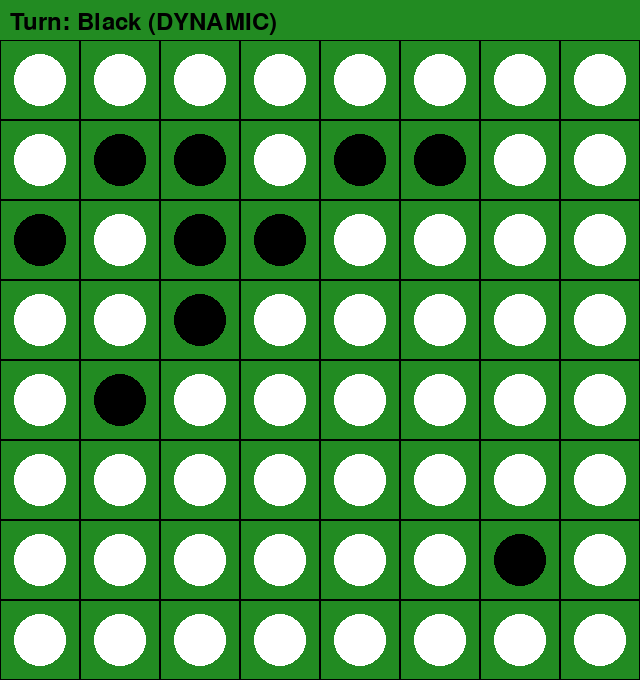

Game Over!
Black: 10, White: 54
White wins! 🐼


In [ ]:
import pygame
import random
import copy
from IPython.display import display, Image, clear_output
import time

# 定数
BLACK = 1
WHITE = 2
EMPTY = 0
CELL_SIZE = 80
BOARD_SIZE = 8
SCREEN_SIZE = CELL_SIZE * BOARD_SIZE
GREEN = (34, 139, 34)
WHITE_COLOR = (255, 255, 255)
BLACK_COLOR = (0, 0, 0)
LINE_COLOR = (0, 0, 0)

# 初期ボード作成
def create_board():
    board = [[EMPTY] * BOARD_SIZE for _ in range(BOARD_SIZE)]
    board[3][3] = BLACK
    board[4][4] = BLACK
    board[3][4] = WHITE
    board[4][3] = WHITE
    return board

# 有効な手を取得
def get_valid_moves(board, stone):
    moves = []
    for y in range(BOARD_SIZE):
        for x in range(BOARD_SIZE):
            if can_place_x_y(board, stone, x, y):
                moves.append((x, y))
    return moves

# 石を置けるか判定
def can_place_x_y(board, stone, x, y):
    if board[y][x] != EMPTY:
        return False
    opponent = 3 - stone
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        found_opponent = False
        while 0 <= nx < BOARD_SIZE and 0 <= ny < BOARD_SIZE and board[ny][nx] == opponent:
            nx += dx
            ny += dy
            found_opponent = True
        if found_opponent and 0 <= nx < BOARD_SIZE and 0 <= ny < BOARD_SIZE and board[ny][nx] == stone:
            return True
    return False

# 手を適用
def apply_move(board, stone, x, y):
    opponent = 3 - stone
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    board[y][x] = stone

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        tiles_to_flip = []
        while 0 <= nx < BOARD_SIZE and 0 <= ny < BOARD_SIZE and board[ny][nx] == opponent:
            tiles_to_flip.append((nx, ny))
            nx += dx
            ny += dy
        if 0 <= nx < BOARD_SIZE and 0 <= ny < BOARD_SIZE and board[ny][nx] == stone:
            for flip_x, flip_y in tiles_to_flip:
                board[flip_y][flip_x] = stone

# 盤面を画像として保存
def draw_board_image(board, filename="othello.png", current_turn="Black", current_ai="PANDA"):
    pygame.init()
    screen = pygame.Surface((SCREEN_SIZE, SCREEN_SIZE + 40))
    screen.fill(GREEN)

    for y in range(BOARD_SIZE):
        for x in range(BOARD_SIZE):
            rect = pygame.Rect(x * CELL_SIZE, y * CELL_SIZE + 40, CELL_SIZE, CELL_SIZE)
            pygame.draw.rect(screen, LINE_COLOR, rect, 1)
            if board[y][x] == BLACK:
                pygame.draw.circle(screen, BLACK_COLOR, rect.center, CELL_SIZE // 3)
            elif board[y][x] == WHITE:
                pygame.draw.circle(screen, WHITE_COLOR, rect.center, CELL_SIZE // 3)

    font = pygame.font.Font(None, 36)
    text = font.render(f"Turn: {current_turn} ({current_ai})", True, BLACK_COLOR)
    screen.blit(text, (10, 10))

    pygame.image.save(screen, filename)
    pygame.quit()

# PandaAI（ランダム）
class PandaAI:
    def face(self):
        return "🐼"

    def name(self):
        return "PANDA"

    def place(self, board, stone):
        valid_moves = get_valid_moves(board, stone)
        return random.choice(valid_moves) if valid_moves else (-1, -1)

# MinimaxAI　（ミニマックス法）
class MinimaxAI:
    def face(self):
        return "🤖"

    def name(self):
        return "MINIMAX"

    def place(self, board, stone):
        valid_moves = get_valid_moves(board, stone)
        return valid_moves[0] if valid_moves else (-1, -1)

# DynamicMinimaxAI　（評価法　３段階に分ける）
class DynamicMinimaxAI:
    def face(self):
        return "🎓"

    def name(self):
        return "DYNAMIC"

    def place(self, board, stone):
        valid_moves = get_valid_moves(board, stone)
        return valid_moves[-1] if valid_moves else (-1, -1)

# ゲーム進行
def play_game(ai1, ai2):
    board = create_board()
    current_stone = BLACK
    ai_map = {BLACK: ai1, WHITE: ai2}
    filename = "othello.png"

    while True:
        current_turn = "Black" if current_stone == BLACK else "White"
        current_ai = ai_map[current_stone].name()

        draw_board_image(board, filename, current_turn, current_ai)
        clear_output(wait=True)
        display(Image(filename=filename))
        time.sleep(1)

        if not get_valid_moves(board, current_stone):
            current_stone = 3 - current_stone
            if not get_valid_moves(board, current_stone):
                break

        x, y = ai_map[current_stone].place(board, current_stone)
        if (x, y) != (-1, -1):
            apply_move(board, current_stone, x, y)

        current_stone = 3 - current_stone

    black_score = sum(row.count(BLACK) for row in board)
    white_score = sum(row.count(WHITE) for row in board)
    print("Game Over!")
    print(f"Black: {black_score}, White: {white_score}")
    if black_score > white_score:
        print(f"Black wins! {ai_map[BLACK].face()}")
    elif white_score > black_score:
        print(f"White wins! {ai_map[WHITE].face()}")
    else:
        print("It's a tie!")

# 対戦開始
play_game(DynamicMinimaxAI(), PandaAI())


In [ ]:
from othello2024.MinimaxAI import MinimaxAI

ModuleNotFoundError: No module named 'othello2024.MinimaxAI'